In [1]:
%matplotlib inline

import os.path as osp
import numpy as np
import matplotlib.pyplot as plt
import cv2
import _init_paths
from RenderAndCompare.datasets import Dataset, NoIndent, draw_bbx2d, sample_object_infos
import matplotlib

matplotlib.rcParams['figure.figsize'] = (12, 8)

In [2]:
dataset_file = "/home/abhijit/Workspace/RenderAndCompare/build/kitti_trainval.json"
dataset = Dataset.from_json(dataset_file)

In [3]:
print dataset

Dataset(name="kitti_trainval", with 6551 annotations)


In [4]:
def display_cv_image(image):
    plt.imshow(image[:,:,::-1])
    plt.xticks([]), plt.yticks([])
    plt.show()

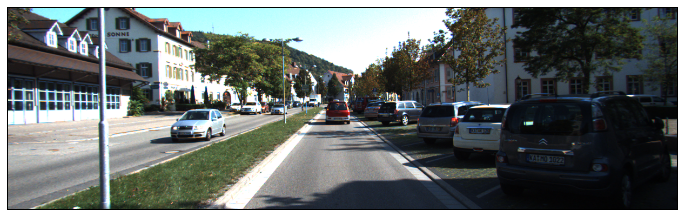

In [5]:
frame_num = 32
image_info = dataset.annotations()[frame_num]
image = cv2.imread(osp.join(dataset.rootdir(), image_info['image_file']))
display_cv_image(image)

number_of_gt_objects = 11


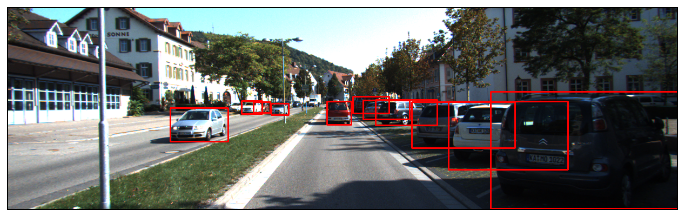

In [6]:
print "number_of_gt_objects = {}".format(len(image_info['objects']))
gt_boxes = [obj_info['bbx_visible'] for obj_info in image_info['objects']]
display_cv_image(draw_bbx2d(image, gt_boxes, (0, 0, 255), 2))

number_of_sampled_objects = 64


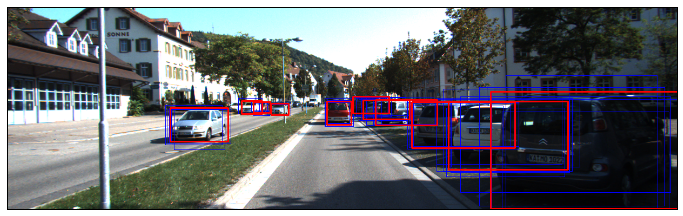

In [9]:
sampled_object_infos = sample_object_infos(image_info['objects'], 64, 0.7)
print "number_of_sampled_objects = {}".format(len(sampled_object_infos))
sampled_boxes = [obj_info['bbx_crop'] for obj_info in sampled_object_infos]
image_with_all_boxes = draw_bbx2d(image, sampled_boxes, (255, 0, 0), 1)
display_cv_image(draw_bbx2d(image_with_all_boxes, gt_boxes, (0, 0, 255), 2))